<a href="https://colab.research.google.com/github/GeorgeGlennon/Part-II-Chemistry-Programming/blob/Exercise-2/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installation of the required files
!git clone https://gitlab.developers.cam.ac.uk/ch/thom/part2programming.git

Cloning into 'part2programming'...
remote: Enumerating objects: 4555, done.
remote: Total 4555 (delta 0), reused 0 (delta 0), pack-reused 4555 (from 1)
Receiving objects: 100% (4555/4555), 5.05 MiB | 5.03 MiB/s, done.
Resolving deltas: 100% (4527/4527), done.
Updating files: 100% (4550/4550), done.


In [2]:
#Required libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import sys

print("### H2O and H2S PES and vibrational frequency program ###\n")

user_input = 0
selection = input("Please type 'O' for H2O or 'S' for H2S or '1' to exit: ")

while user_input == 0:
  if selection == 'O':
      user_input = 1
  elif selection == 'S':
    user_input = 1
  elif selection == '1':
    sys.exit()
  else:
    selection = input("Invalid input, Please type 'O' for H2O, 'S' for H2S or '1' to exit: ")

def parse_point(inputpath):
  """
  Function extracts SCF energy(line 167 or 168), Bond length(line 111) and Bond angle(line 97)
  """

  f = open("/content/part2programming/Ex2/H2"+selection+"outfiles/"+inputpath, 'r')
  lines = f.readlines()
  try:
    scf_energy = float(lines[167].split()[4])
  except:
    scf_energy = float(lines[168].split()[4])
  bond_angle = float(lines[97].split()[4])
  bond_length = float(lines[111].split()[2])
  return bond_length, bond_angle, scf_energy

lengths = []
energies = []
angles = []

for file in os.listdir("/content/part2programming/Ex2/H2"+selection+"outfiles"):
  lengths.append(parse_point(file)[0])
  angles.append(parse_point(file)[1])
  energies.append(parse_point(file)[2])



### H2O and H2S PES and vibrational frequency program ###

Please type 'O' for H2O or 'S' for H2S or '1' to exit: S


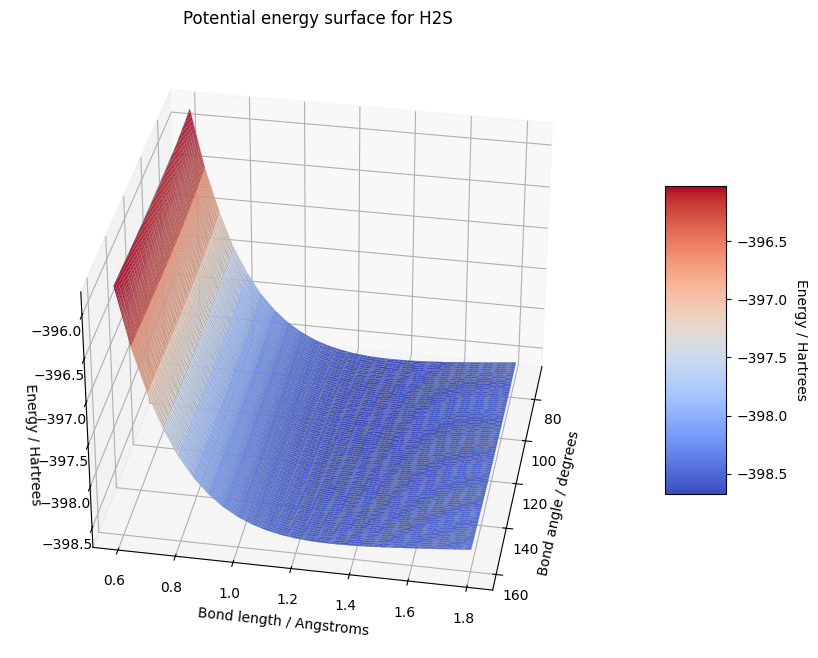

In [3]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_trisurf(angles, lengths, energies, cmap='coolwarm', linewidth=0.1, antialiased=True, edgecolor='gray')

# Add a color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('Energy / Hartrees', rotation=270, labelpad=15)

# Set labels and title
ax.set_xlabel('Bond angle / degrees')
ax.set_ylabel('Bond length / Angstroms')
ax.set_zlabel('Energy / Hartrees')
ax.set_title('Potential energy surface for H2'+selection)

ax.view_init(elev=33, azim=10)

# Show the plot
plt.show()

###### Data for H2S ######

Mimimum energy of: -398.675628032 Hartrees with corresponding bond length of: 1.35 Angstroms and bond angle of: 94.0 degrees.
Optimal parameters: Kr = 832.15 Jm⁻², Kt = 8.10487e-19 Jrad⁻²

Symmetric Stretch Frequency: 2657.4305149946326 cm⁻¹
Bending Frequency: 1228.6524949913553 cm⁻¹



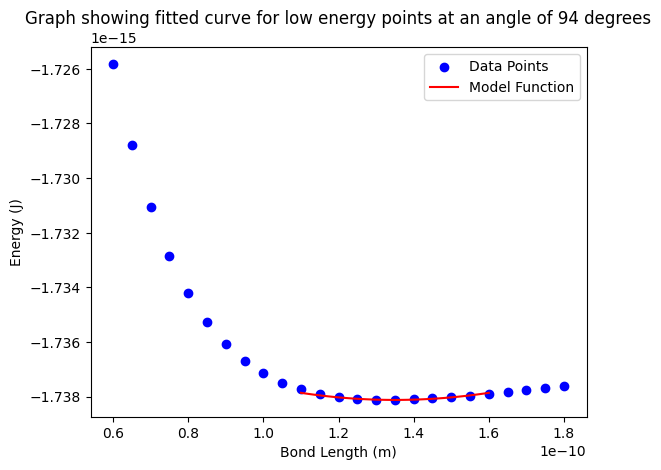

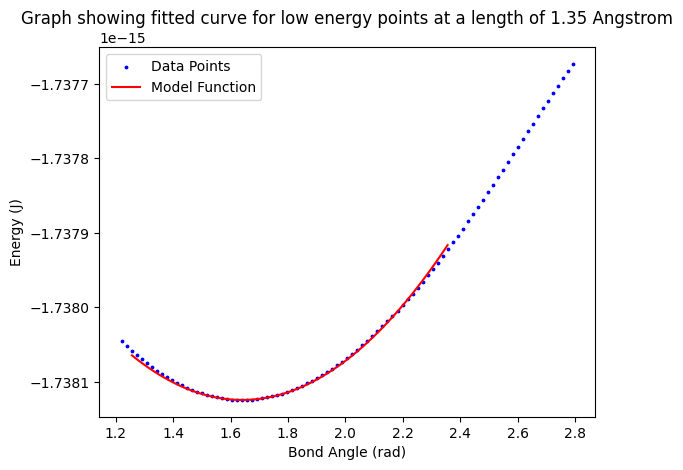

In [5]:
from scipy.optimize import curve_fit

# Conversions
Eh = 4.3597447222071E-18
deg_rad = np.pi/180
C = 29979245800
A_M = 10**(-10)
Mu = 1.66053906660 * 10**(-27)

#Determining minimum energy parameters
min_index = energies.index(min(energies))
eq_length = lengths[min_index] * A_M
eq_angle = angles[min_index] * deg_rad
eq_energy = energies[min_index] * Eh

if selection == "O":
  difference = 0.08
  print("###### Data for H2O ######\n")
  plt.ylim(-3.315*10**-16, -3.295*10**-16)
  plotangles1 = np.linspace(0.54*np.pi,0.79*np.pi,100)
  plotlengths1 = np.linspace(0.8*10**-10,1.2*10**-10,100)
  FL = 0.95
  FT = 105
else:
  difference = 0.06
  print("###### Data for H2S ######\n")
  plotangles1 = np.linspace(0.4*np.pi,0.75*np.pi,100)
  plotlengths1 = np.linspace(1.1*10**-10,1.6*10**-10,100)
  FL = 1.35
  FT = 94

print("Mimimum energy of:" ,energies[min_index], "Hartrees with corresponding bond length of:",lengths[min_index],"Angstroms and bond angle of:", angles[min_index],"degrees.")

# Determine indices of low energy parameters

N = [i for i, e in enumerate(energies) if e <(energies[min_index] + difference) ]

lowA = []
lowR = []
lowE = []
for n in N:
  lowR.append(lengths[n]*A_M)
  lowA.append(angles[n]*deg_rad)
  lowE.append(energies[n] * Eh)

data = [lowR,lowA]

#Function that returns molecular energy using the taylor expansion of the harmonic potential
def fitter(data,Kr,Kt):
  r, theta = data
  return eq_energy + 0.5 * Kr *( (r - eq_length) ** 2) + 0.5 * Kt *( (theta - eq_angle) ** 2)

popt, pcov = curve_fit(fitter, data, lowE)

Kr_fit = popt[0]
Kt_fit = popt[1]
z=-2

#Outputting the data from the curve fitting for low energies
print(f"Optimal parameters: Kr = {Kr_fit:.2f} Jm\u207b\u00b2, Kt = {Kt_fit:.5e} Jrad\u207b\u00b2\n")

sym_freq = (1/(2*np.pi)) * np.sqrt((Kr_fit)/(2 * Mu))
bend_freq =  (1/(2*np.pi)) * np.sqrt((Kt_fit)/(eq_length ** 2 * 0.5 * Mu))

print("Symmetric Stretch Frequency:", sym_freq / C, "cm⁻¹")
print("Bending Frequency:", bend_freq / C, "cm⁻¹\n")

plotlengths = []
plotenergies = []

#Plotting a PES cross section for a fixed angle

for i in range(len(angles)):
    if angles[i] == FT:
        plotlengths.append(lengths[i] * A_M)
        plotenergies.append(energies[i] * Eh)

plotlengths = np.array(plotlengths)
plotenergies = np.array(plotenergies)

sorted_indices = np.argsort(plotlengths)
plotlengths = plotlengths[sorted_indices]
plotenergies = plotenergies[sorted_indices]

theta_fixed = FT * deg_rad
model_energies = eq_energy + 0.5 * Kr_fit * (plotlengths1 - eq_length) ** 2 + 0.5 * Kt_fit * (theta_fixed - eq_angle) ** 2

plt.scatter(plotlengths, plotenergies, label="Data Points", color='blue')

plt.plot(plotlengths1, model_energies, label="Model Function", color='red')

# Graph plotting
plt.xlabel("Bond Length (m)")
plt.ylabel("Energy (J)")
FT = str(FT)
plt.title("Graph showing fitted curve for low energy points at an angle of "+FT+" degrees")
plt.legend()
plt.show()

plotangles = []
plotenergies = []

#Plotting a PES cross section for a fixed bond length

for i in range(len(lengths)):
    if lengths[i] == FL:
        plotangles.append(angles[i] * deg_rad)
        plotenergies.append(energies[i] * Eh)

plotangles = np.array(plotangles)
plotenergies = np.array(plotenergies)

sorted_indices = np.argsort(plotangles)
plotangles = plotangles[sorted_indices]
plotenergies = plotenergies[sorted_indices]


length_fixed = FL * A_M
model_energies = eq_energy + 0.5 * Kr_fit * (length_fixed - eq_length) ** 2 + 0.5 * Kt_fit * (plotangles1 - eq_angle) ** 2

plt.scatter(plotangles, plotenergies, label="Data Points", color='blue', s = 3)

plt.plot(plotangles1, model_energies, label="Model Function", color='red')

# Graph plotting
plt.xlabel("Bond Angle (rad)")
plt.ylabel("Energy (J)")
FL = str(FL)
plt.title("Graph showing fitted curve for low energy points at a length of "+FL+" Angstrom")
plt.legend()
plt.show()